In [1]:
#Text Mining on Elon-musk tweets
#Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Elon = pd.read_csv("C:/Users/Prashant/Downloads/Elon_musk (1).csv")
Elon

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
Elon = Elon.drop('Unnamed: 0',axis=1)
em = Elon.copy()
em 

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
em.shape


(1999, 1)

In [6]:
em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [7]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
wordnet = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prashant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [9]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
wordnet = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prashant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
em = [Text.strip() for Text in em.Text] # remove both the leading and the trailing characters
em = [Text for Text in em if Text] # removes empty strings, because they are considered in Python as False
em[0:20]

['@kunalb11 I�m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It�s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [11]:
EM_tweet = "".join(em)

In [12]:
EM_tweet

'@kunalb11 I�m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It�s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is true p

In [13]:
import string
import warnings
warnings.filterwarnings('ignore')
import re #regular expression


# Clean The Data using RegEx
#result = re.sub(pattern, repl, string, count=0, flags=0)

def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    text = re.sub(r"_[A-Za-z0-9]", "", text)#Removing underscores

    
    return text
# Clean The Text
Elon["Text"] = Elon["Text"].apply(cleantext)
Elon.head()


,Text
0,I�m an alien
1,Aarmack Ray tracing on Cyberpunk with HDR is n...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...


In [14]:
Elon.tail() # We have removed most of the unnecessary stuff from our tweets dat

,Text
1994,"True, it sounds so surreal, but the negative ..."
1995,Make sure to read ur terms &amp; conditions b...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...
1998,Progress update August 28


In [15]:
 import nltk

In [16]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [17]:
pip install NLTK

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install punkt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement punkt
ERROR: No matching distribution found for punkt


In [19]:
from nltk.tokenize import word_tokenize

In [20]:
text_tokens = word_tokenize(EM_tweet)

In [21]:
print(text_tokens[0:50])

['@', 'kunalb11', 'I�m', 'an', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27', 'Doge', 'is', 'underestimated', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for']


In [22]:
len(text_tokens)

28508

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prashant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:50])

['@', 'kunalb11', 'I�m', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'next-level', '.', 'Have', 'tried', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27', 'Doge', 'underestimated', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'next', 'even', '!', '!', 'Happy', 'New', 'Year', 'Ox', '!', 'https', ':', '//t.co/9WFKMYu2ojFrodo', 'underdoge']


In [25]:
lower_words = [Text.lower() for Text in no_stop_tokens]
print(lower_words[0:50])


['@', 'kunalb11', 'i�m', 'alien', '@', 'id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next-level', '.', 'have', 'tried', '?', '@', 'joerogan', '@', 'spotify', 'great', 'interview', '!', '@', 'gtera27', 'doge', 'underestimated', '@', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', '.', 'now', 'next', 'even', '!', '!', 'happy', 'new', 'year', 'ox', '!', 'https', ':', '//t.co/9wfkmyu2ojfrodo', 'underdoge']


In [26]:
from nltk.stem import PorterStemmer

In [27]:
stemmed_tokens = [PorterStemmer().stem(word) for word in lower_words]
print(stemmed_tokens[0:50])

['@', 'kunalb11', 'i�m', 'alien', '@', 'id_aa_carmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'next-level', '.', 'have', 'tri', '?', '@', 'joerogan', '@', 'spotifi', 'great', 'interview', '!', '@', 'gtera27', 'doge', 'underestim', '@', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', '.', 'now', 'next', 'even', '!', '!', 'happi', 'new', 'year', 'ox', '!', 'http', ':', '//t.co/9wfkmyu2ojfrodo', 'underdog']


In [28]:
EM_tweet = re.sub("[^A-Za-z" "]+"," ",EM_tweet).lower()
EM_tweet =re.sub("[0-9" "]+"," ",EM_tweet)

In [29]:
tweet_rev_words = EM_tweet.split(" ")

In [30]:
tweet_rev_string =" ".join(tweet_rev_words)

In [31]:
tweet_rev_string

' kunalb i m an alien id aa carmack ray tracing on cyberpunk with hdr is next level have you tried it joerogan spotify great interview gtera doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox https t co wfkmyu ojfrodo was the underdoge all thought he would fail himself most of all https t co zgxjfdzzrm owensparks flcnhvy anonyx haha thanks flcnhvy anonyx indeed tweets definitely do not represent real world time allocation the most entertaining outcome is the most likely givedirectly just sent somejust agree to do clubhouse with kanyewesthttps t co rwe uhsts geoffkeighley unrealengine it s getting realbought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy u f u f this is true power haha https t co fc uhqsd o freewalletorg any crypto

In [32]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
tweet_rev_words = [w for w in tweet_rev_words if not w in stop_words]
EM_tweet =" ".join(tweet_rev_words)
EM_tweet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prashant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


' kunalb alien id aa carmack ray tracing cyberpunk hdr next level tried joerogan spotify great interview gtera doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox https co wfkmyu ojfrodo underdoge thought would fail https co zgxjfdzzrm owensparks flcnhvy anonyx haha thanks flcnhvy anonyx indeed tweets definitely represent real world time allocation entertaining outcome likely givedirectly sent somejust agree clubhouse kanyewesthttps co rwe uhsts geoffkeighley unrealengine getting realbought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u f u f true power haha https co fc uhqsd freewalletorg crypto wallet give private keys avoided costs freewalletorg app sucksrt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission https co pwt ajtourville yes blkmdl rationaletienne adamklot

In [33]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=2000,
                      height=1400
                     ).generate(EM_tweet)

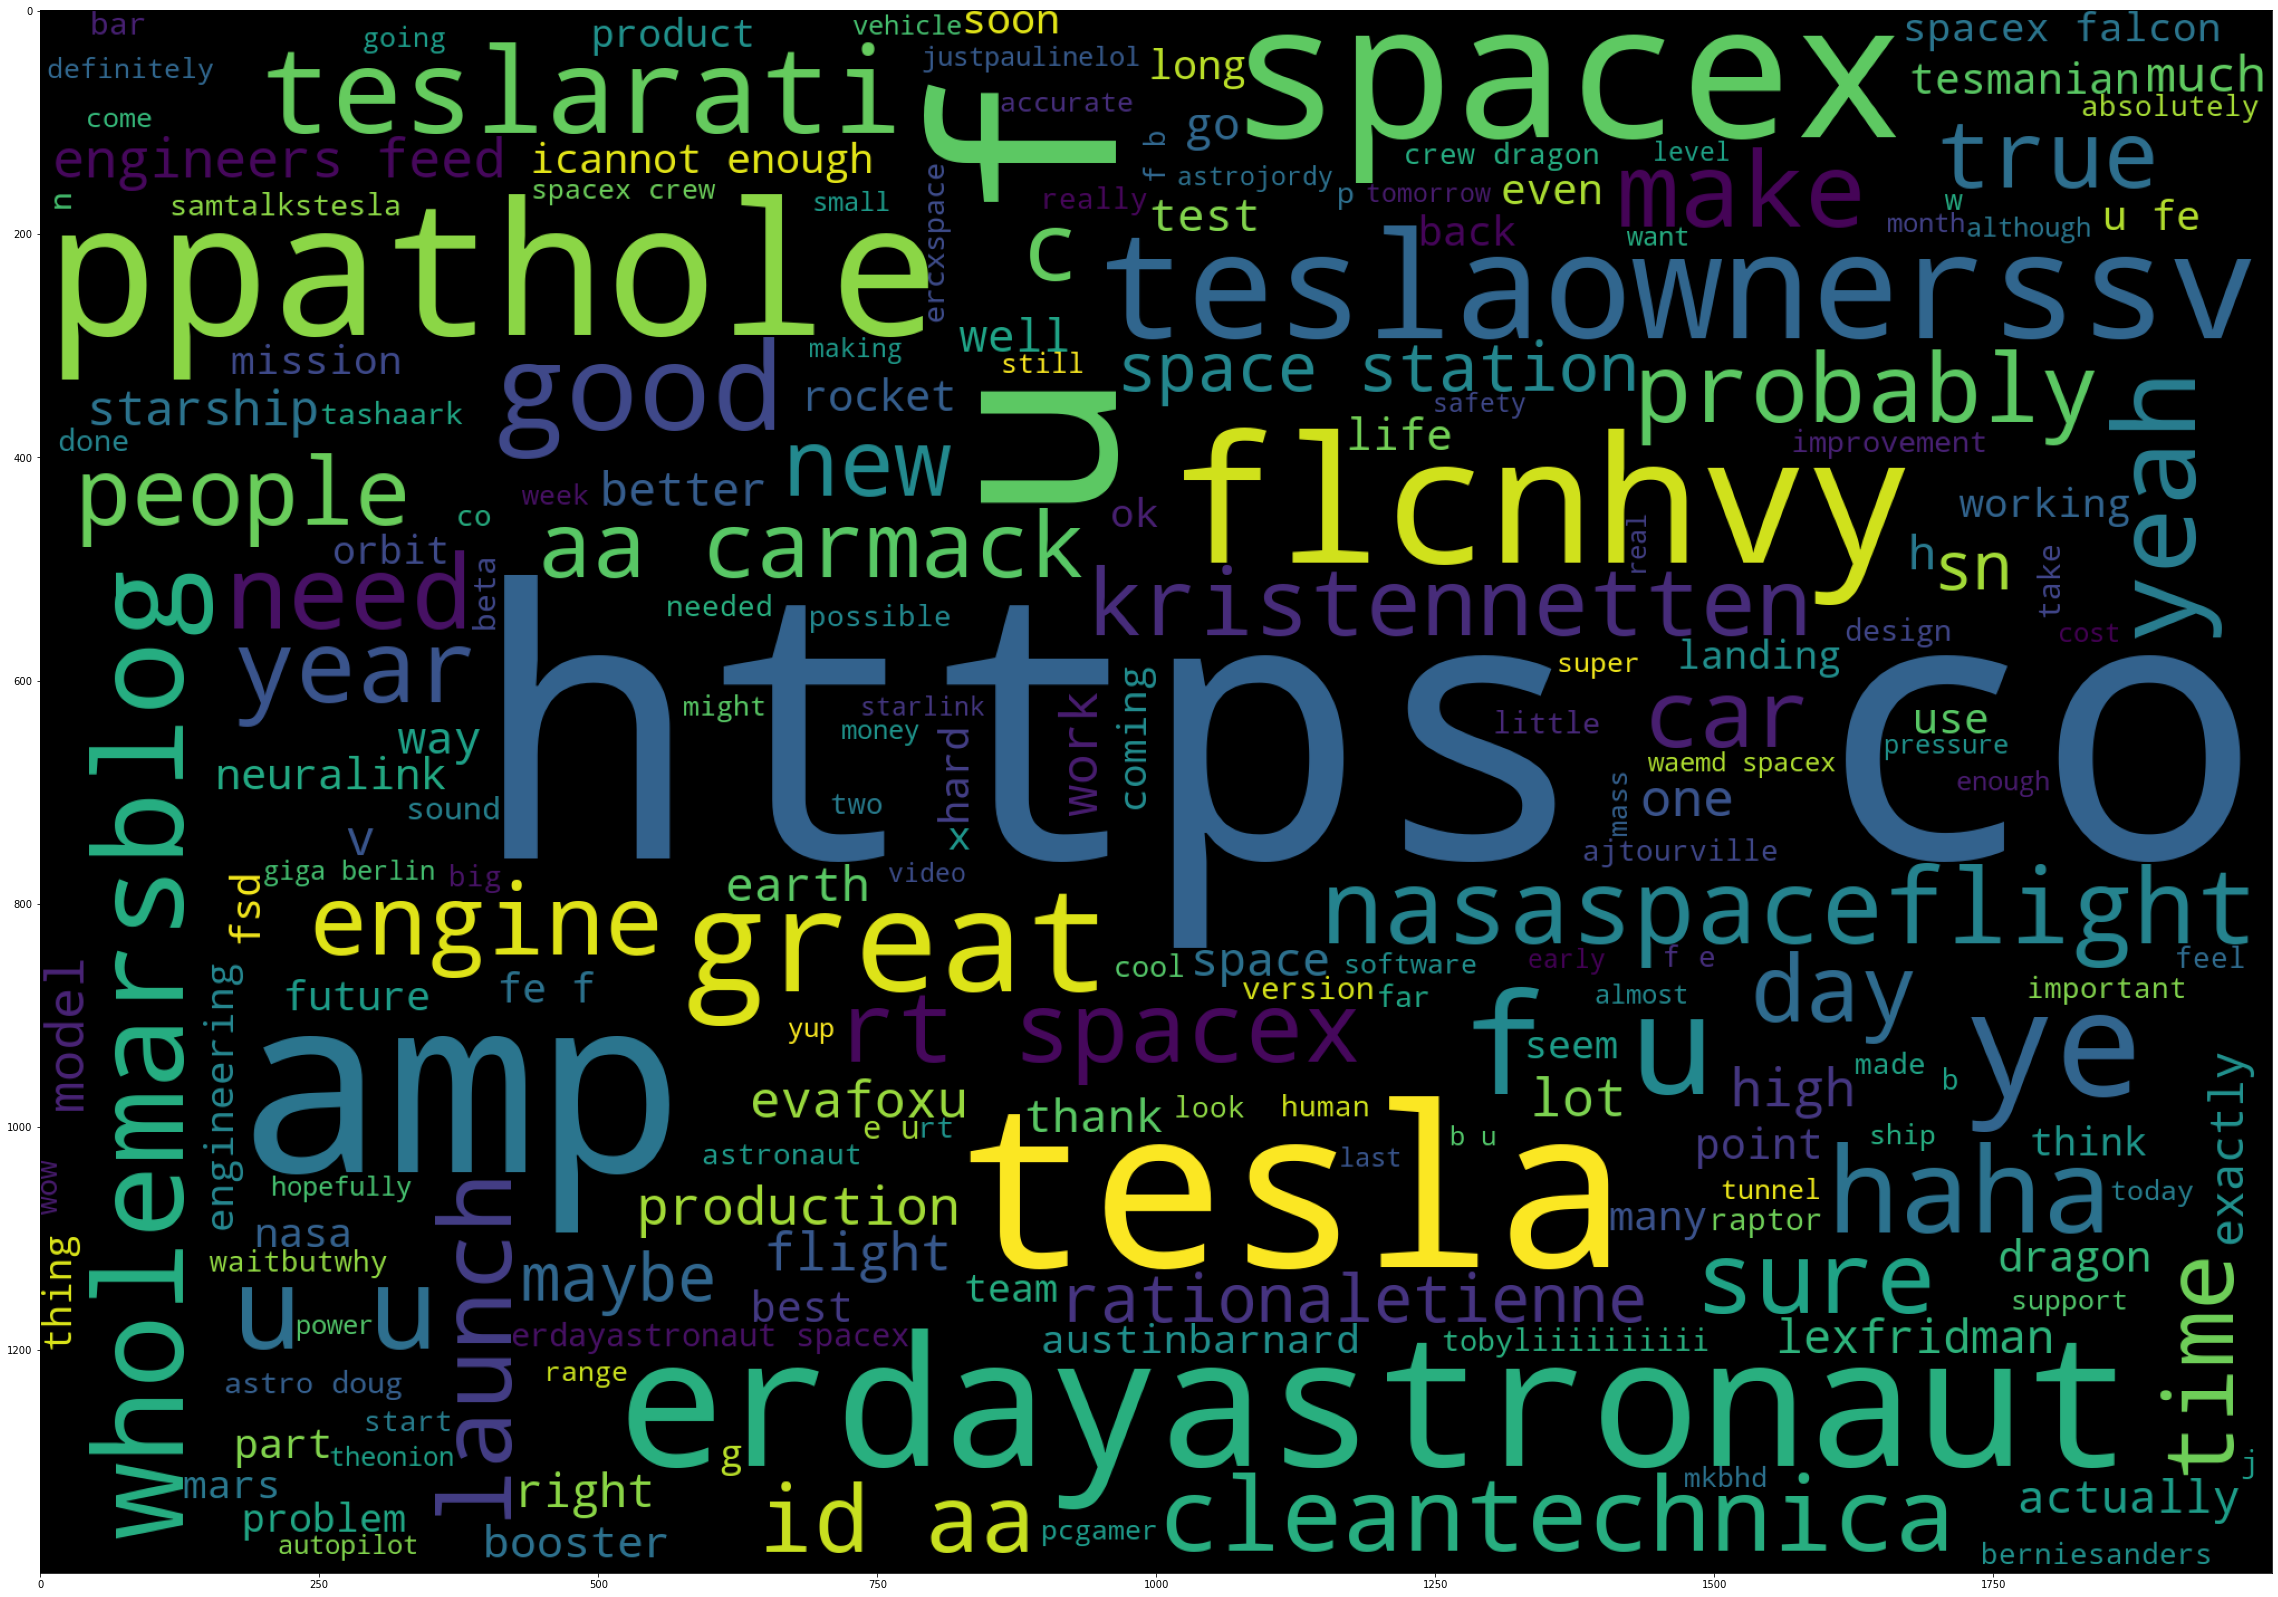

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize = (40,30))
plt.imshow(wordcloud_ip)

In [42]:
import vaderSentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer

ModuleNotFoundError: No module named 'vaderSentiment'

In [43]:
with open("C:/Users/Prashant/Downloads/positive-words (1).txt","r") as pos:
    poswords = pos.read().split("\n")

In [44]:
poswords = poswords[36:]

In [45]:
poswords

['abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'affordabl